# Sensor IMU Data Analysis
This notebook contains the following data visualization tools
- 3D position scatter plot (interactive)
- Pitch/roll/yaw histograms
- Pitch vs velocity
- Stability vs velocity

## Setting up interactive plots
Run the following terminal commands to install IPython ([source](https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab)). It might take a few minutes. If the plots don't load, stop and restart the jupyter server.

In [1]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter lab build

Building jupyterlab assets (production, minimized)
[LabBuildApp] JupyterLab 3.0.0
[LabBuildApp] Building in /home/jumpingjon/miniconda3/envs/sensor/share/jupyter/lab
[LabBuildApp] Building jupyterlab assets (production, minimized)


## Matplotlib 3D Plots
I am using matplotlib for the 3d plots. [Here](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) is the documentation/tutorials.

In [5]:
# https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/

# Enable interactive plots
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt 

fig = plt.figure() 
ax = plt.axes(projection ='3d') 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [6]:
# https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/

# importing mplot3d toolkits 
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
  
# defining axes 
z = np.linspace(0, 1, 100) 
x = z * np.sin(25 * z) 
y = z * np.cos(25 * z) 
c = x + y 
ax.scatter(x, y, z, c = c,depthshade=True) 
  
# syntax for plotting 
ax.set_title('3d Scatter plot') 
plt.show() 



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

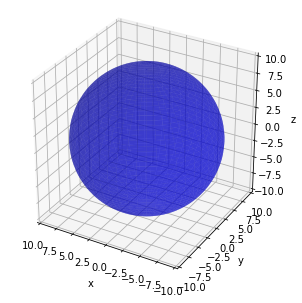

In [1]:
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

'''
========================
3D surface (solid color)
========================

Demonstrates a very basic plot of a 3D surface using a solid color.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,5))
# nrows, ncols, index
ax = fig.add_subplot(111, projection='3d')
ax.axes.set_xlim3d(left=10, right=-10) 
ax.axes.set_ylim3d(bottom=-10, top=10) 
ax.axes.set_zlim3d(bottom=-10, top=10) 
ax.axes.set_xlabel('x')
ax.axes.set_ylabel('y')
ax.axes.set_zlabel('z')


# Make data
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Use an equal unit aspect ratio
ax.set_box_aspect((10, 10, 10))

# Plot the surface
ax.plot_surface(x, y, z, color='b',alpha=0.5)
plt.show()


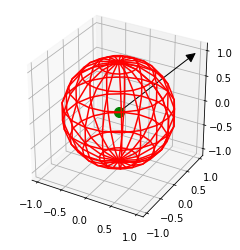

In [2]:
# https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector-in-matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure()
ax = fig.gca(projection='3d')

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

# draw a point
ax.scatter([0], [0], [0], color="g", s=100)

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0, 1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)

ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))

plt.show()

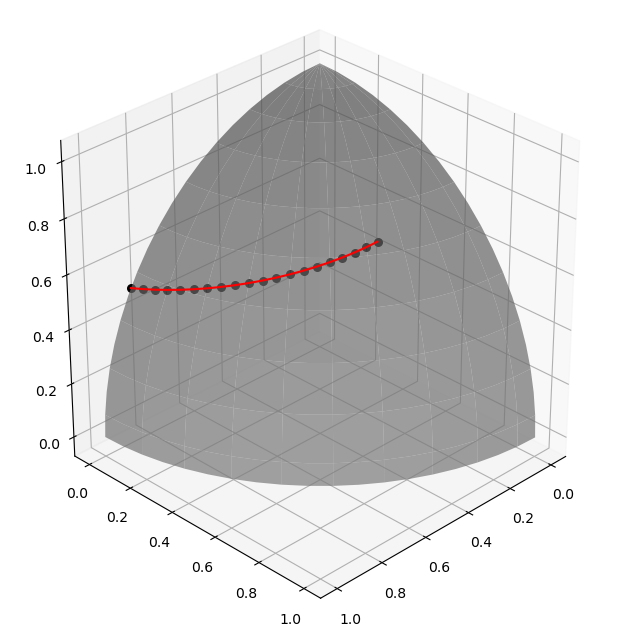

In [3]:
# https://stackoverflow.com/questions/56010933/matplotlib-plot3d-surface-line-scatter-plot-how-to-define-z-order

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

cos=np.cos
sin=np.sin
arccos=np.arccos
pi = np.pi

def getxyz(in_theta,in_phi,scale=1.0):
    x = scale*sin(in_theta)*cos(in_phi)
    y = scale*sin(in_theta)*sin(in_phi)
    z = scale*cos(in_theta)
    return x,y,z

# ==============  SCRIPT  ================

# Initialize Figure
fig = plt.figure(figsize=(8,8),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))


# Plot Sphere Surface-plot
NS=10
Sx,Sy,Sz = getxyz(*np.mgrid[0:pi/2:NS*2j, 0:pi/2:NS*2j])
ax.plot_surface(Sx,Sy,Sz,rstride=2,cstride=2, color=(0.5,0.5,0.5,0.7),zorder=100)

# Make a line on the sphere
Nl=20
Lx,Ly,Lz = getxyz(np.linspace(pi/3,pi/4,Nl),np.linspace(0,pi/3,Nl))

# Plot Scatter
ax.scatter(Lx,Ly,Lz,s=30,c='k',depthshade=False,zorder=500)
# Plot Line
ax.plot(Lx,Ly,Lz,'r-',zorder=4)

ax.view_init(30, 45)
# fig.savefig("test.png")
plt.show()

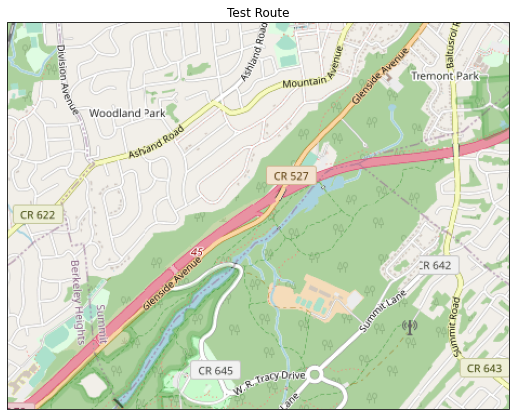

In [4]:
# https://scitools.org.uk/cartopy/docs/latest/gallery/tube_stations.html#sphx-glr-gallery-tube-stations-py
%matplotlib inline
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM # uses tiles from Open Street Map


# decimal latitude conversion
def dd_lat(x):
    degrees = int(x) // 100
    minutes = x - 100*degrees
    return degrees + minutes/60

# decimal longitude conversion
def dd_lon(x):
    return -dd_lat(x)

offset = 0.015
# set boundary coordinates (bottom left to top right)
lat1 = dd_lat(4041.6) + offset
lat2 = dd_lat(4042.0) - offset
lon1 = dd_lon(7421.8) + offset
lon2 = dd_lon(7422.4) - offset


imagery = OSM()

fig = plt.figure(figsize=(9, 13))
ax = fig.add_subplot(1, 1, 1, projection=imagery.crs)
ax.set_extent([lon1, lon2, lat1, lat2], ccrs.PlateCarree())

# Add the imagery to the map.
ax.add_image(imagery, 14)

ax.set_title('Test Route')
plt.show()

In [ ]:
# only need to run this once

# https://medium.com/@thabangline/how-to-use-conda-and-pip-to-install-packages-within-jupyter-notebook-d0f2ed23b059
# pytransform3d not in any conda channels, use pip instead, but it might not be tracked in conda
import sys
!{sys.executable} -m pip install pytransform3d
# pytransform3d-1.5

In [ ]:
%matplotlib widget
from pytransform3d.plot_utils import plot_vector
from pytransform3d.rotations import quaternion_integrate, matrix_from_quaternion, plot_basis

fig = plt.figure(figsize=(10,10)) 
ax3 = plt.axes(projection ='3d') 
ax3.axes.set_xlim3d(left=df_list[0]['long'].min(), right=df_list[0]['long'].max()) 
ax3.axes.set_ylim3d(bottom=df_list[0]['lat'].min(), top=df_list[0]['lat'].max()) 
ax3.axes.set_zlim3d(bottom=0, top=df_list[0]['elev'].max()) 
ax3.axes.set_xlabel('Longitude')
ax3.axes.set_ylabel('Latitude')
ax3.axes.set_zlabel('Elevation')


# select every nth row
n=20
Q = df_list[0][['fr_qw','fr_qx','fr_qy','fr_qz']][::n].to_numpy()

ax = None # I think i need this line to reset ax from previous plots, so it doesn't interfere with this one
for t in range(len(Q)):
    R = matrix_from_quaternion(Q[t])
    p = np.array([df_list[0].iloc[t*n]['long'],df_list[0].iloc[t*n]['lat'],df_list[0].iloc[t*n]['elev']])
    #plot_vector(ax=ax, direction=b, color="g")
    ax3 = plot_basis(ax=ax3, s=0.0015, R=R, p=p)
plt.show()

## Python Quarternion Implementation

In [9]:
# https://www.meccanismocomplesso.org/en/hamiltons-quaternions-and-3d-rotation-with-python/

def q_conjugate(q):
    w, x, y, z = q
    return (w, -x, -y, -z)

def qv_mult(q1, v1):
    q2 = (0.0,) + v1
    return q_mult(q_mult(q1, q2), q_conjugate(q1))[1:]

def q_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
    z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
    return w, x, y, z

def euler_to_quaternion(phi, theta, psi):
 
        qw = m.cos(phi/2) * m.cos(theta/2) * m.cos(psi/2) + m.sin(phi/2) * m.sin(theta/2) * m.sin(psi/2)
        qx = m.sin(phi/2) * m.cos(theta/2) * m.cos(psi/2) - m.cos(phi/2) * m.sin(theta/2) * m.sin(psi/2)
        qy = m.cos(phi/2) * m.sin(theta/2) * m.cos(psi/2) + m.sin(phi/2) * m.cos(theta/2) * m.sin(psi/2)
        qz = m.cos(phi/2) * m.cos(theta/2) * m.sin(psi/2) - m.sin(phi/2) * m.sin(theta/2) * m.cos(psi/2)
 
        return [qw, qx, qy, qz]

def quaternion_to_euler(w, x, y, z):
 
        t0 = 2 * (w * x + y * z)
        t1 = 1 - 2 * (x * x + y * y)
        X = m.atan2(t0, t1)
 
        t2 = 2 * (w * y - z * x)
        t2 = 1 if t2 > 1 else t2
        t2 = -1 if t2 < -1 else t2
        Y = m.asin(t2)
         
        t3 = 2 * (w * z + x * y)
        t4 = 1 - 2 * (y * y + z * z)
        Z = m.atan2(t3, t4)
 
        return X, Y, Z

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import math as m


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Cartesian axes
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')


# input vector
v1 = (1,0,0)
phi = m.pi/2
theta = m.pi/4
psi = m.pi/2
# quaternion
q = euler_to_quaternion(phi, theta, psi)
# output vector
v2 = qv_mult(q,v1)

# Vector before rotation
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='b')
# Vector after rotation
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='r')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
plt.show()



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
# get bearing from two coordinates

# https://stackoverflow.com/questions/54873868/python-calculate-bearing-between-two-lat-long
# https://www.igismap.com/formula-to-find-bearing-or-heading-angle-between-two-points-latitude-longitude/
import math

def get_bearing(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = math.atan2(x,y)
    brng = np.rad2deg(brng)
    return brng